FACE RECOGNITION (CNN ALGORITHM) (BY:P SWATHIKA)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 10

In [3]:
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2,)

In [4]:
train_data = datagen.flow_from_directory("/content/drive/MyDrive/extra_need/Datas/Preprocessed",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training")

Found 120 images belonging to 3 classes.


In [5]:
val_data = datagen.flow_from_directory("/content/drive/MyDrive/extra_need/Datas/Preprocessed",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation")

Found 30 images belonging to 3 classes.


In [6]:
class_indices=train_data.class_indices
class_names=list(class_indices.keys())
print("Class indices:",class_indices)
print("Class names:",class_names)

Class indices: {'Santhoshs': 0, 'Swathikas': 1, 'Vishwas': 2}
Class names: ['Santhoshs', 'Swathikas', 'Vishwas']


In [12]:
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(train_data,epochs=7,validation_data=val_data,batch_size=BATCH_SIZE)

Epoch 1/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2145 - loss: 2.2376

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.2184 - loss: 2.1870 - val_accuracy: 0.3333 - val_loss: 1.0770
Epoch 2/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.3327 - loss: 1.0620 - val_accuracy: 0.4667 - val_loss: 0.9889
Epoch 3/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4830 - loss: 0.8702 - val_accuracy: 0.6333 - val_loss: 0.8514
Epoch 4/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7042 - loss: 0.7380 - val_accuracy: 0.6000 - val_loss: 1.1508
Epoch 5/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6939 - loss: 0.5886 - val_accuracy: 0.4333 - val_loss: 1.1995
Epoch 6/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6690 - loss: 0.6513 - val_accuracy: 0.6667 - val_loss: 0.7595
Epoch 7/7
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7309 - loss: 0.5797 - val_accuracy: 0.7333 - val_loss: 0.8280


In [16]:
model.save('/content/drive/MyDrive/extra_need/h5_pkl/face_reco.h5')

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/extra_need/h5_pkl/face_reco.h5')
print("Model Loaded")

Model Loaded


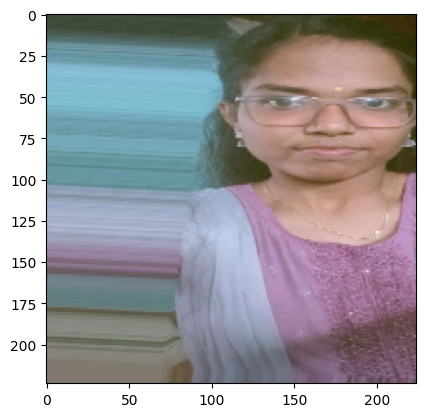

In [20]:
test_image_path='/content/drive/MyDrive/extra_need/Datas/Preprocessed/Swathikas/aug_0_5219.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [21]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
Swathikas
